<a href="https://colab.research.google.com/github/weathon/kNN_Research/blob/main/Credit_Card_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!cp kaggle.json /root/.kaggle/
!kaggle datasets download -d sakshigoyal7/credit-card-customers
!unzip credit-card-customers.zip 

  0% 0.00/379k [00:00<?, ?B/s]
100% 379k/379k [00:00<00:00, 67.6MB/s]
Archive:  credit-card-customers.zip
  inflating: BankChurners.csv        


In [4]:
import pandas as pd
import numpy as np

### Data Washing

In [9]:
BankChurners = pd.read_csv("BankChurners.csv")

In [10]:
del BankChurners["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"]
del BankChurners["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]

In [11]:
Y = BankChurners["Attrition_Flag"]
del BankChurners["Attrition_Flag"]
del BankChurners["CLIENTNUM"]
X = BankChurners

In [12]:
Y = Y.replace("Existing Customer",0).replace("Attrited Customer",1)

In [13]:
X["Gender"] = X["Gender"].replace("M",1).replace("F",0)
X["Marital_Status"] = X["Marital_Status"].replace("Married",0).replace("Single",1).replace("Divorced",2).replace("Unknown",3)
X["Education_Level"] = X["Education_Level"].replace("Uneducated",0).replace("High School",1).replace("College",2).replace("Graduate",3).replace("Post-Graduate",4).replace("Doctorate",5).replace("Unknown",-1)
X["Card_Category"] = X["Card_Category"].replace("Blue",0).replace("Silver",1).replace("Gold",2).replace("Platinum",3)
X["Income_Category"] = X["Income_Category"].replace("Less than $40K",0).replace("$40K - $60K",1).replace("$60K - $80K",2).replace("$80K - $120K",3).replace("$120K +",4).replace("Unknown",-1)

In [ ]:
df = df[['mean', '0', '1', '2', '3']]

### Baseline: tradional kNN

In [ ]:
def result(sum0, sum1):
  return 1 if sum1>sum0 else 0

In [ ]:
X = np.array(X)
Y = np.array(Y)
indexs = np.arange(len(X))

np.random.shuffle(indexs)
X = X[indexs]
Y = Y[indexs]
def train_step(A, k):
  global X,Y
  r = int(len(X)*0.3)
  npX = np.array(X[:r])
  npY = np.array(Y[:r])
  X_val = np.array(X[r:])
  Y_val = np.array(Y[r:])

  error = 0
  TruePositives = 0
  FalseNegatives = 0
  FalsePositives = 0
  TrueNegatives = 0
  MSE = 0

  for sample in range(len(X)-r): # change this from 20 to r decreased the accuracy a alot
    distance = np.sum(A*(npX - X_val[sample])**2,axis=1) #tamadeguaibudebuxiajiangzheli dou ba A shanle gai k cixingqilai yang
    sum0 = 0
    sum1 = 0
    for i in range(k):
      m = np.argmin(distance)
      distance[m] = 1000000000 
      sum0 += 1/(distance[m]+1) * (1-npY[m]) #yansuankunduzi yachiyansuan lhlong tt jul zhelishibushiyeyao A benlaiiangqiudaodedfaxianleyansuan bukedaoyansunkun paper erduorerduozhangshoubihuanganshouppapers bushi. a zhe li de zhejie qu yongdistance a shousuan
      sum1 += 1/(distance[m]+1) * (npY[m])

    if(Y_val[sample] != result(sum0, sum1)):
      error+=1
    
    if Y_val[sample] == result(sum0, sum1) == 1:
      TruePositives += 1

    if result(sum0, sum1) == 0 and Y_val[sample] == 1:
      FalseNegatives +=1

    if result(sum0, sum1) == 1 and Y_val[sample] == 0:
      FalsePositives +=1

    if Y_val[sample] == result(sum0, sum1) == 0:
      TrueNegatives += 1

    MSE += (sum1/(sum0+sum1) - Y_val[sample])**2

  print("accuracy: ",1-error/r)
  print("F1 Sore: ",(TruePositives / (TruePositives + FalsePositives)*(TruePositives / (TruePositives + FalseNegatives))/
                     (TruePositives / (TruePositives + FalsePositives)+(TruePositives / (TruePositives + FalseNegatives)))))
  # print(MSE/(len(X)-r)) 
  # return MSE/(len(X)-r)
  return  MSE/(len(X)-r)

In [ ]:
A = np.ones(19)
A[8] = 800000
train_step(A, 50)

accuracy:  0.7192231731402239
F1 Sore:  0.2271273192578375


0.08580358301594213

In [ ]:
A = np.ones(19)
train_step(A, 50)

accuracy:  0.7182356813693219
F1 Sore:  0.24092009685230023


0.08822852306390326

In [ ]:
# Guess and try method for GD
#xiamianyangttnianbenlaishibuyiyangdewhyxianzaiyiyang
A = np.random.normal(size=19)
def ff(A):
  return (A/50)**2
#duziniannashoukunnianyuenixnnasho ninasuanhuang shujubianda fanerjianadanttduaizi 
for e in range(10):
  for i in range(19):
    loss = train_step(A, 50)
    A[i] += 1 #zheliojialeyaojianhuiqu a buranbaizuole shabixiamainyanghaihshibuxingkunyachiyangyijingzuixiaole? yijingzuixiaole a shabi!
    loss2 = train_step(A, 50) #guaibudebuxing A shi float !! yachikunxikanlexiamiancaizhidaoyahciyahci 
    slope = (loss2-loss)
    A[i] -=slope*100+1
    print()
    print(slope) #younlossshouzang you loss yebujianshao niaozaixiayicijianshaojkunniaodzi kunlossfuncion
    print(loss) #henduodifangniaoshi0yachicitongxkoukunttzhebujiuxlettmanhduoniao chouweishiianaa hwenduobuwei0dewsmdingzheyigekannengnian zhejiuduilema niaokunyachi buzhiyigedifangyou soopettnao
#yunchaojyunnaiogaileyibanyachi xkoumeiyouaaaniaoyoubuxinglehenduo bujiansahode qunasi0bukenegkunnia


In [ ]:
np.sum(A*(npX - X_val[sample])**2,axis=1)[3] #lengyachi yunkunlengduzi sum youwenti?meiyou zhejiushi 10 ge meige sde kijuli

27826.0

In [ ]:
np.array([1,2])*[
                 [1,1],[2,2],[3,3],[4,4]
]

array([[1, 2],
       [2, 4],
       [3, 6],
       [4, 8]])

In [ ]:
A[0]=1e100

In [ ]:
A = np.ones(19)

In [ ]:
A[1]=1000000
A[2]=1000000
A[3]=1000000 #haishiyoubianhuadewhyzhiqinamieyo taychikunyun 1 bushi0xiamian

In [ ]:
A=np.random.normal(size=19)

y=[]
for x in range(10):
  loss=train_step(A,50)#yansuanlyahcikunyuenxin zhekiangge doukeyi lai zuo  
  A=np.random.normal(size=19)
  y.append(loss) #yansanguaibudezhijieloss?bush aaaychihuang yahichiyansuan shanglmian loss= leilekuna duzikouketyahcituranxiangdao wozhegesuofangdeshibushiwuyiyideliang?s

In [ ]:
A = np.array([1,1])
B = np.copy(A)
A[0]=-9
B

array([1, 1])

In [ ]:
A=np.random.normal(size=19)

y=[]
for x in range(100):#niaokoukekunzhege shijhuasuanfattkunnnashouyouhua bengbaza
  loss=train_step(A,50)
  B=np.random.normal(size=19)*0.1+A #koukeniaoyyangzheyang koukeniaolearningratejiaozang
  loss2=train_step(B,50)
  # loss2=train_step(A,50)
  if loss2<loss:
    print(loss2)
    A=np.copy(B)
  else:
    print("failed")

failed
0.16520344195232017
0.16388664127521518
0.1634252503879249
0.1631056002257019
failed
failed
failed
failed
failed
0.16297125123430703
0.1629388630272255
0.16266993934264384
failed
failed
0.16241393708562635
failed
0.16213880660177826
failed
0.16192991959373762
0.16181932571589874
failed
0.16146553815771023
failed
0.1614312879108488
0.16138157709126927
0.16117054591620883
0.16080259557060333
0.1607916490337149
failed
0.16035423896177287
failed
0.160344985188321
0.16001263930032558
0.15982079277754374
failed
0.15911344336295766
failed
failed
failed
0.15904172661870614
failed
0.1589806178586554
0.15845693327690885
0.15823230356891038
0.15759035124841378
0.1553517844547904
0.1537546057271846
failed
0.1535006912117388
failed
0.1473957398786894
failed
failed
0.10541255466215511
0.103020905628441
0.09977249259416242
0.09966477641416498
0.09894162787417367
0.09877494710114498
failed
failed
failed
0.09782716885315526
0.09657379037946355
failed
failed
failed
failed
0.09627022146988516
0.09

kunshouzangbushoulie kun ttyunnashou huang xkou yuntt chaojikun xianhuachulai?xianbusuiji?kun

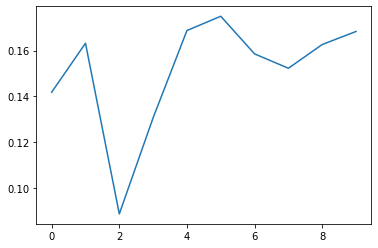

In [ ]:
import matplotlib.pyplot as plt
#niaokunkouek weismzihiqianshishanghsende jhuasuanfa?niao huangkun zang jiaozang

plt.plot(y) #kunyachi haidouyiyng meisuijichaojikuntttt kuns shixianshag?niaotaijidogongjliyahci sui ji de A faner youbianhua le zengzhang  yachi xielvfanerbusing

In [ ]:
# zhengming A shi youyxiangdekunbunengzhiyongyigebianliang 

0.9859556725916173
0.37058823529411766
0.75
0.08788173741362298


0.08788173741362298

In [ ]:
sum1/(sum0+sum1)

0.18000000000000022

In [ ]:
sum

-9.999999989999978e-08

In [ ]:
distance[8]

4043056.074194

### Baseline 2 (NN)

In [ ]:
import tensorflow as tf

import os
import tensorflow_datasets as tfds
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
import tensorflow as tf

import os
import tensorflow_datasets as tfds
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(X.shape[1]),
  tf.keras.layers.Dense(40, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(60, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])
model.summary()
# print(model.output_shape)
model.compile(optimizer=tf.keras.optimizers.Adam(),
          loss='binary_crossentropy',metrics=["accuracy"])
model.fit(input, label, epoches = 50)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 40)                800       
                                                                 
 dense_17 (Dense)            (None, 50)                2050      
                                                                 
 dense_18 (Dense)            (None, 60)                3060      
                                                                 
 dense_19 (Dense)            (None, 50)                3050      
                                                                 
 dense_20 (Dense)            (None, 20)                1020      
                                                                 
 dense_21 (Dense)            (None, 10)                210       
                                                                 
 dense_22 (Dense)            (None, 1)                

In [ ]:
model.fit(X,Y)

317/317 [==============================] - 1s 4ms/step - loss: 0.6061 - accuracy: 0.8216
